## 1.1

In [1]:
import pandas as pd
# 讀取 csv 檔案
dengue = pd.read_csv("./Homework_1_dataset/Dengue_y2008_2018.csv")
dengue_merge = pd.read_csv("./Homework_1_dataset/Dengue_y2019_.csv")

dengue

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2010,1,11.341161,24.549217,78.661751,0.000922,0.0
1,2009,12,13.732589,26.410247,79.276498,0.000922,0.0
2,2014,12,14.105000,25.980369,82.176959,0.001843,11.0
3,2008,12,15.921232,26.389862,83.570507,0.001843,0.0
4,2014,1,12.127849,24.829401,79.981567,0.003687,15.0
...,...,...,...,...,...,...,...
130,2018,9,26.052791,33.249018,81.186929,263.166667,3087.0
131,2018,8,26.485821,32.998422,82.824068,355.225806,1796.0
132,2018,5,23.849552,32.017304,78.580927,429.677419,52.0
133,2018,6,25.919038,28.062791,82.316178,653.166667,295.0


In [2]:
# 把一個 dengue_merge 的行疊加到 dengue 的行上
combined_df = pd.concat([dengue, dengue_merge], ignore_index=True)
combined_df

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2010,1,11.341161,24.549217,78.661751,0.000922,0.0
1,2009,12,13.732589,26.410247,79.276498,0.000922,0.0
2,2014,12,14.105000,25.980369,82.176959,0.001843,11.0
3,2008,12,15.921232,26.389862,83.570507,0.001843,0.0
4,2014,1,12.127849,24.829401,79.981567,0.003687,15.0
...,...,...,...,...,...,...,...
132,2018,5,23.849552,32.017304,78.580927,429.677419,52.0
133,2018,6,25.919038,28.062791,82.316178,653.166667,295.0
134,2018,7,26.367367,32.160596,84.509402,689.161290,946.0
135,2019,1,12.062041,26.741035,77.990248,0.000000,38.0


## 1.2

In [3]:
# check any missing value and display it
na_observation = combined_df[combined_df.isnull().any(axis=1)]
na_observation

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
40,2009,12,18.888888,NaN,78.888888,0.888888,NaN


In [4]:
# remove the missing values
combined_df = combined_df.dropna()
combined_df

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2010,1,11.341161,24.549217,78.661751,0.000922,0.0
1,2009,12,13.732589,26.410247,79.276498,0.000922,0.0
2,2014,12,14.105000,25.980369,82.176959,0.001843,11.0
3,2008,12,15.921232,26.389862,83.570507,0.001843,0.0
4,2014,1,12.127849,24.829401,79.981567,0.003687,15.0
...,...,...,...,...,...,...,...
132,2018,5,23.849552,32.017304,78.580927,429.677419,52.0
133,2018,6,25.919038,28.062791,82.316178,653.166667,295.0
134,2018,7,26.367367,32.160596,84.509402,689.161290,946.0
135,2019,1,12.062041,26.741035,77.990248,0.000000,38.0


## 1.3

In [5]:
# check any duplicated data and display it
dup_observation = combined_df[combined_df.duplicated()]
dup_observation

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
37,2008,2,13.658286,26.383448,72.602956,0.687685,0.0
48,2008,1,12.993929,25.059539,78.824885,1.286636,0.0


In [6]:
# remove the duplicated data
combined_df = combined_df.drop_duplicates()
combined_df

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2010,1,11.341161,24.549217,78.661751,0.000922,0.0
1,2009,12,13.732589,26.410247,79.276498,0.000922,0.0
2,2014,12,14.105000,25.980369,82.176959,0.001843,11.0
3,2008,12,15.921232,26.389862,83.570507,0.001843,0.0
4,2014,1,12.127849,24.829401,79.981567,0.003687,15.0
...,...,...,...,...,...,...,...
132,2018,5,23.849552,32.017304,78.580927,429.677419,52.0
133,2018,6,25.919038,28.062791,82.316178,653.166667,295.0
134,2018,7,26.367367,32.160596,84.509402,689.161290,946.0
135,2019,1,12.062041,26.741035,77.990248,0.000000,38.0


## 1.4

In [7]:
# define the function that wan to use "apply" on the pandas series
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'
    
combined_df['SEASON'] = combined_df['MONTH'].apply(month_to_season)
combined_df.head()

C:\Users\Terry\AppData\Local\Temp\ipykernel_37264\108583640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['SEASON'] = combined_df['MONTH'].apply(month_to_season)


,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE,SEASON
0,2010,1,11.341161,24.549217,78.661751,0.000922,0.0,winter
1,2009,12,13.732589,26.410247,79.276498,0.000922,0.0,winter
2,2014,12,14.105000,25.980369,82.176959,0.001843,11.0,winter
3,2008,12,15.921232,26.389862,83.570507,0.001843,0.0,winter
4,2014,1,12.127849,24.829401,79.981567,0.003687,15.0,winter


In [8]:
# group the data by season to sum the "DENGUE" values
seasonal_dengue_sum = combined_df.groupby('SEASON')['DENGUE'].sum().reset_index()
seasonal_dengue_sum

,SEASON,DENGUE
0,fall,16298.0
1,spring,515.0
2,summer,10537.0
3,winter,1002.0


## 1.5

In [9]:
# convert 'YEAR','MONTH','SEASON' columns to catgorical
categ_cols = ['YEAR','MONTH','SEASON']
combined_df[categ_cols] = combined_df[categ_cols].astype('category')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   YEAR      134 non-null    category
 1   MONTH     134 non-null    category
 2   MIN       134 non-null    float64 
 3   MAX       134 non-null    float64 
 4   HUMIDITY  134 non-null    float64 
 5   RAINFALL  134 non-null    float64 
 6   DENGUE    134 non-null    float64 
 7   SEASON    134 non-null    category
dtypes: category(3), float64(5)
memory usage: 7.6 KB


C:\Users\Terry\AppData\Local\Temp\ipykernel_37264\2132718389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[categ_cols] = combined_df[categ_cols].astype('category')


## 1.6

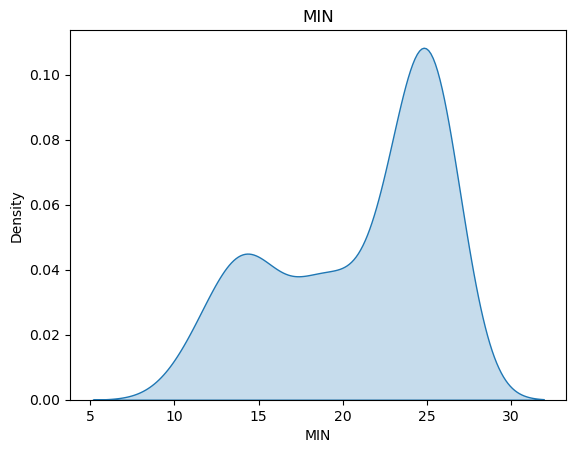

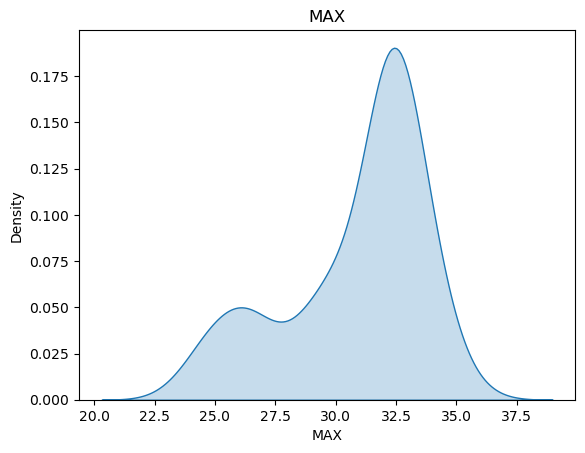

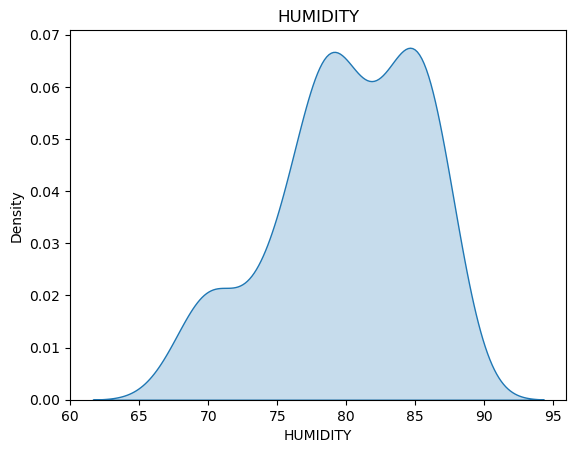

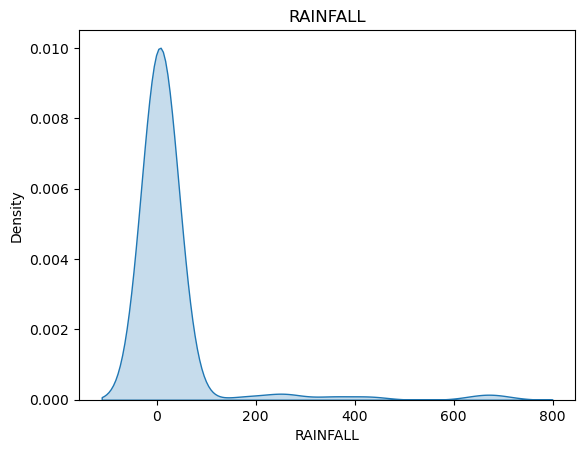

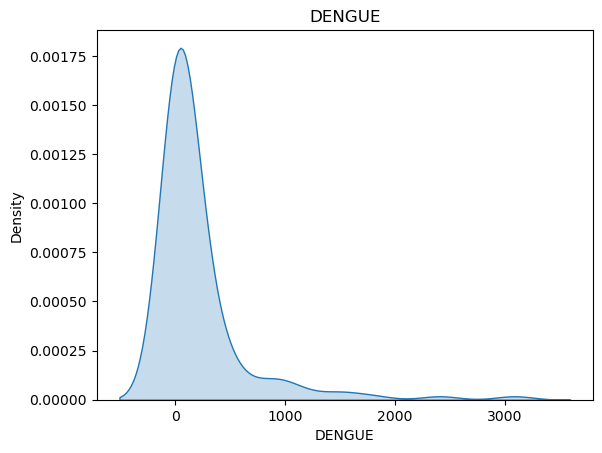

,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,"Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)","Axes(0.125,0.11;0.775x0.77)"
1,"Text(0.5, 1.0, 'MIN')","Text(0.5, 1.0, 'MAX')","Text(0.5, 1.0, 'HUMIDITY')","Text(0.5, 1.0, 'RAINFALL')","Text(0.5, 1.0, 'DENGUE')"
2,None,None,None,None,None


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#create density plot  for continuous variables -> dtype exclude category
numerical_cols = combined_df.select_dtypes(exclude='category').columns

combined_df[numerical_cols].apply(lambda x:(sns.kdeplot(x, fill=True),
                                            plt.title(x.name),
                                            plt.show()))

## 1.7

                sum_sq     df          F    PR(>F)
MIN       2.458449e+06    1.0  13.181155  0.000403
Residual  2.461964e+07  132.0        NaN       NaN


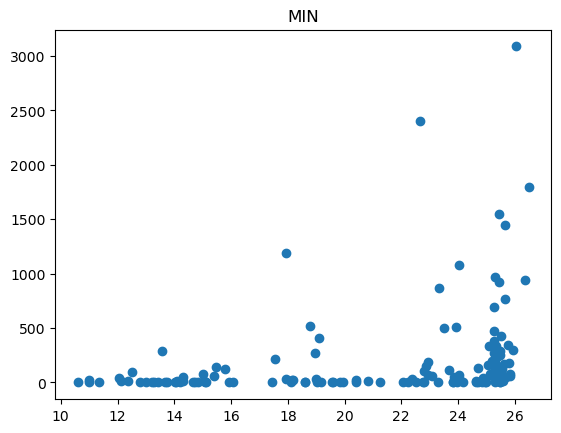

                sum_sq     df         F    PR(>F)
MAX       8.561205e+05    1.0  4.309666  0.039837
Residual  2.622196e+07  132.0       NaN       NaN


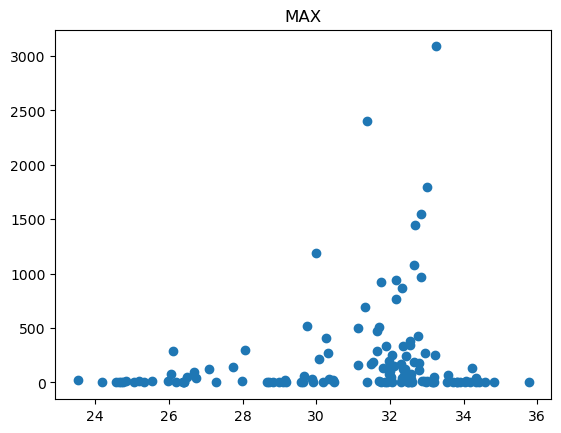

                sum_sq     df          F    PR(>F)
HUMIDITY  2.053186e+06    1.0  10.830035  0.001281
Residual  2.502490e+07  132.0        NaN       NaN


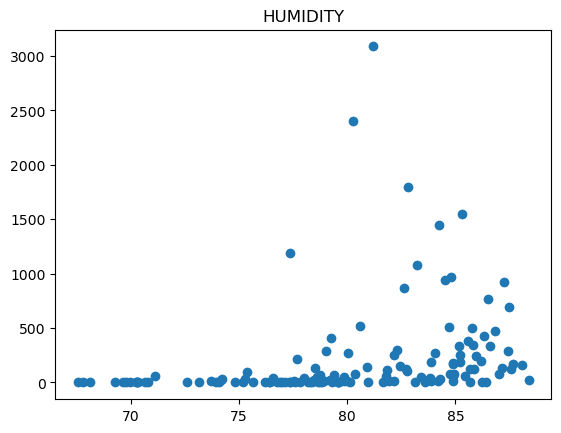

                sum_sq     df          F    PR(>F)
RAINFALL  3.680478e+06    1.0  20.763795  0.000012
Residual  2.339761e+07  132.0        NaN       NaN


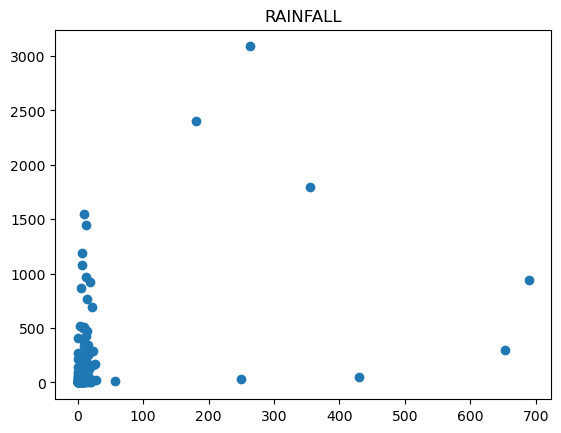

                sum_sq     df             F  PR(>F)
DENGUE    2.707808e+07    1.0  5.687660e+32     0.0
Residual  6.284319e-24  132.0           NaN     NaN


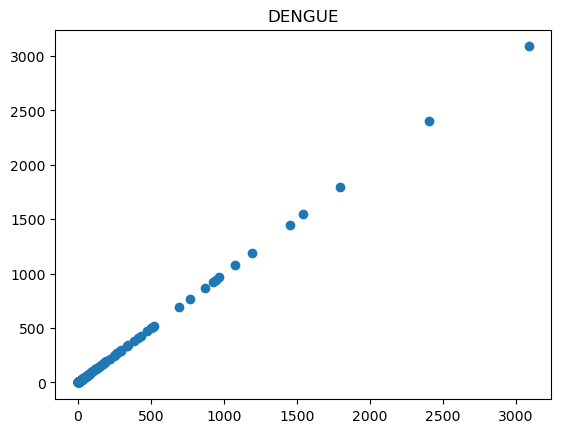

,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,None,None,None,None,None
1,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

# using scatterplot to perform a series of bivariate analysis to check the association between continuous variables and "DENGUE"
combined_df[numerical_cols].apply(lambda x: (print(sm.stats.anova_lm(ols('DENGUE ~ ' + x.name, data=combined_df).fit(),typ=2)),
                                            (plt.scatter(x=combined_df[x.name], y=combined_df['DENGUE']),plt.title(x.name),plt.show())))

## 1.8

In [12]:
import numpy as np
# function that compute mean absolute error (MAE)
def MAE(y_true,y_pred):
    return np.mean(np.abs(y_true-y_pred))


## 1.9

In [13]:
from sklearn.model_selection import train_test_split

# split the combined_df into train and test sets with random seed 1
dengue_train, dengue_test = train_test_split(combined_df, test_size=0.2, random_state=1)


## 1.10

In [14]:
from statsmodels.formula.api import ols

feature_cols = dengue_train.columns.tolist()
feature_cols.remove('DENGUE') 
# build linear_model1 with all features
dengue_formula = 'DENGUE ~' + ' + '.join(feature_cols)
linear_model = ols(dengue_formula, data=dengue_train).fit()

training_pred = linear_model.predict(dengue_train)
testing_pred = linear_model.predict(dengue_test)

# round up to the fourth decimal digits
training_mae = round(MAE(dengue_train['DENGUE'],training_pred),4)
testing_mae = round(MAE(dengue_test['DENGUE'],testing_pred),4)
# report training and testing MAE
print(linear_model.summary())
print('Training MAE:',training_mae)
print('Testing MAE:',testing_mae)

                            OLS Regression Results                            
Dep. Variable:                 DENGUE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     7.815
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.75e-13
Time:                        21:00:48   Log-Likelihood:                -743.24
No. Observations:                 107   AIC:                             1540.
Df Residuals:                      80   BIC:                             1613.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5787.8444   2300.505  

In [15]:
# build linear_model2 with only numerical features
numeric_features = numerical_cols.tolist()
numeric_features.remove('DENGUE')

dengue_formula2 = 'DENGUE ~' + ' + '.join(numeric_features)
linear_model2 = ols(dengue_formula2, data=dengue_train).fit()

training_predictions2 = linear_model2.predict(dengue_train)
testing_predictions2 = linear_model2.predict(dengue_test)
# round up to the fourth decimal digits
training_mae = round(MAE(dengue_train['DENGUE'],training_predictions2),4)
testing_mae = round(MAE(dengue_test['DENGUE'],testing_predictions2),4)
# report training and testing mae
print(linear_model2.summary())
print('Training MAE:',training_mae)
print('Testing MAE:',testing_mae)

                            OLS Regression Results                            
Dep. Variable:                 DENGUE   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     7.745
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.72e-05
Time:                        21:00:48   Log-Likelihood:                -796.68
No. Observations:                 107   AIC:                             1603.
Df Residuals:                     102   BIC:                             1617.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4522.0251   2931.244     -1.543      0.1

- 我建了兩個 linear regression model, 第二個模型表現較好
    - 第一個模型考慮了全部的 feature 在訓練集上表現較好，但在測試集上表現較差，可能有overfitting的問題
    - 第一個模型只考慮了 numerical features (也就是排除categorical features) 結果在訓練集上表現雖然較差，但在測試集上表現較好

- 因此 真正在 inference time 的時候，我們會選擇第二個模型，因為模型在沒見過的資料集上表現較好


## 2.1

In [16]:
import pandas as pd
# read csv file and show parts of the dataset
diamond_df = pd.read_csv("./Homework_1_dataset/Diamonds.csv")
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# remove the column "Unnamed: 0" and change the name of columns "x" ,"y" and "z" into meaningful names
diamond_df.drop(['Unnamed: 0'],axis =1,inplace = True)
# according to the description, change: x -> length_mm; y-> width_mm; z-> depth_mm
diamond_df.rename(columns={'x':'length_mm','y':'width_mm','z':'depth_mm'}, inplace=True)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.2

In [18]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length_mm  53940 non-null  float64
 8   width_mm   53940 non-null  float64
 9   depth_mm   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
import numpy as np
# convert character columns into "category"
categorical_columns = diamond_df.select_dtypes(['object']).columns
diamond_df[categorical_columns] = diamond_df.select_dtypes(['object']).astype('category')
diamond_df.info()

# do log transformation on price
diamond_df['price'] = np.log(diamond_df['price'])
diamond_df['price'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53940 non-null  float64 
 1   cut        53940 non-null  category
 2   color      53940 non-null  category
 3   clarity    53940 non-null  category
 4   depth      53940 non-null  float64 
 5   table      53940 non-null  float64 
 6   price      53940 non-null  int64   
 7   length_mm  53940 non-null  float64 
 8   width_mm   53940 non-null  float64 
 9   depth_mm   53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


count    53940.000000
mean         7.786768
std          1.014649
min          5.786897
25%          6.856462
50%          7.783641
75%          8.580027
max          9.842835
Name: price, dtype: float64

## 2.3

                sum_sq       df              F  PR(>F)
carat     47022.480315      1.0  298092.181698     0.0
Residual   8508.436984  53938.0            NaN     NaN


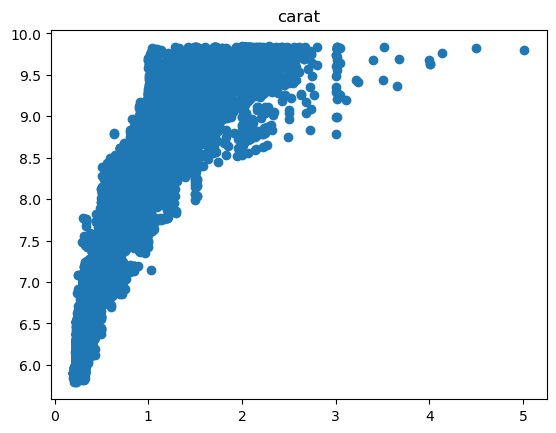

                sum_sq       df           F         PR(>F)
cut        1007.182928      4.0  249.076901  2.083479e-212
Residual  54523.734371  53935.0         NaN            NaN


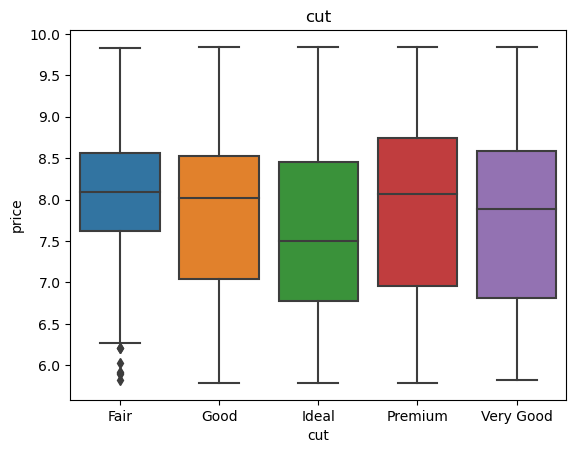

                sum_sq       df           F         PR(>F)
color      1431.255783      6.0  237.807767  3.767555e-301
Residual  54099.661516  53933.0         NaN            NaN


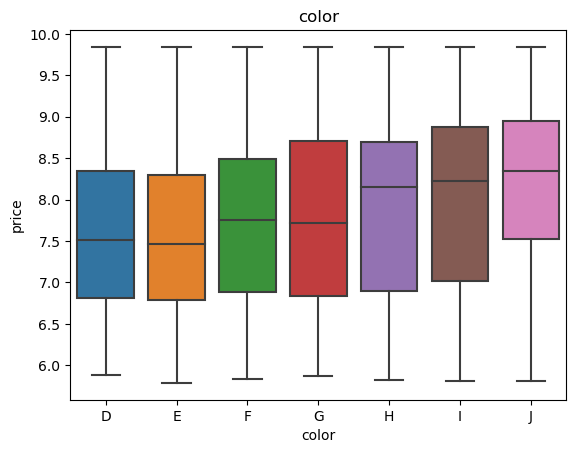

                sum_sq       df           F  PR(>F)
clarity    2836.786081      7.0  414.775241     0.0
Residual  52694.131218  53932.0         NaN     NaN


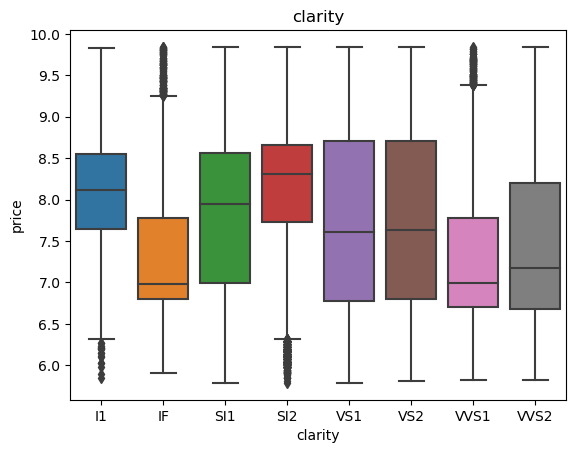

                sum_sq       df         F    PR(>F)
depth         0.041081      1.0  0.039903  0.841672
Residual  55530.876218  53938.0       NaN       NaN


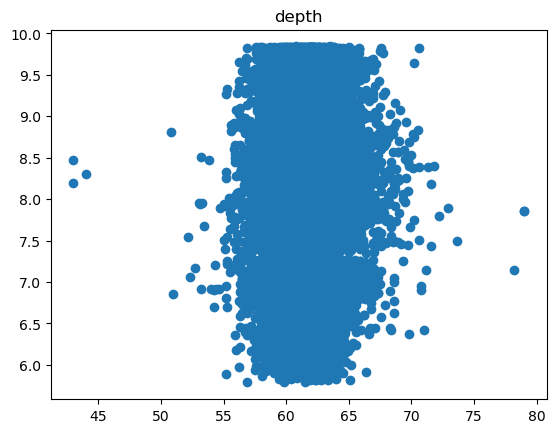

                sum_sq       df            F         PR(>F)
table      1389.924298      1.0  1384.712999  2.784138e-299
Residual  54140.993001  53938.0          NaN            NaN


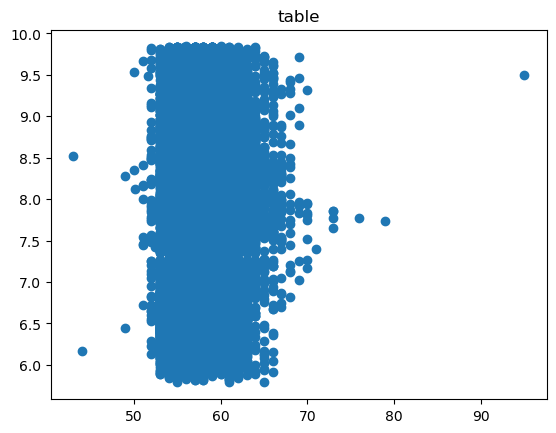

                 sum_sq       df              F  PR(>F)
length_mm  50965.335718      1.0  602106.923163     0.0
Residual    4565.581581  53938.0            NaN     NaN


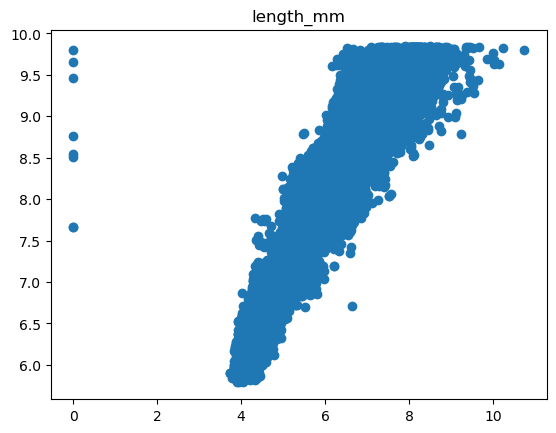

                sum_sq       df              F  PR(>F)
width_mm  48668.390720      1.0  382523.204579     0.0
Residual   6862.526579  53938.0            NaN     NaN


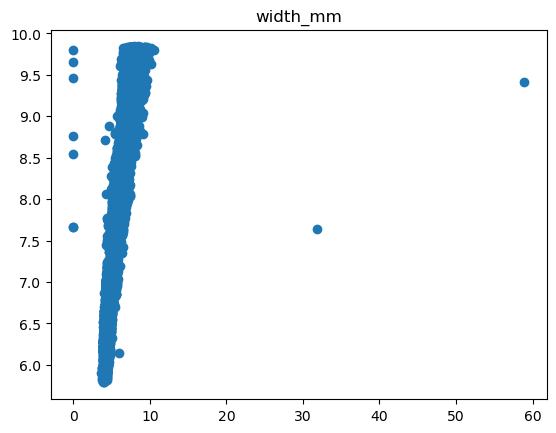

                sum_sq       df              F  PR(>F)
depth_mm  48569.140959      1.0  376300.845779     0.0
Residual   6961.776340  53938.0            NaN     NaN


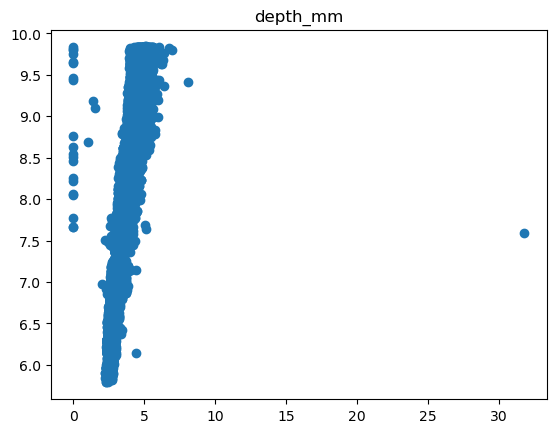

,carat,cut,color,clarity,depth,table,length_mm,width_mm,depth_mm
0,None,None,None,None,None,None,None,None,None
1,(<matplotlib.collections.PathCollection object...,"(Axes(0.125,0.11;0.775x0.77), Text(0.5, 1.0, '...","(Axes(0.125,0.11;0.775x0.77), Text(0.5, 1.0, '...","(Axes(0.125,0.11;0.775x0.77), Text(0.5, 1.0, '...",(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...


In [20]:
# bivariate analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

cols = diamond_df.columns.tolist()
cols.remove('price')

"""
    plot the data to perform a series of bivariate analysis on "price" vs. the rest variables
     and use anova_lm (statistical methods) to check whether "carat" and "cut" are associated with "price"
"""

diamond_df[cols].apply(lambda x:(print(sm.stats.anova_lm(ols('price ~ '+x.name, data=diamond_df).fit(),typ=2)),
                                    (sns.boxplot(data=diamond_df,x=x.name,y='price'), plt.title(x.name), plt.show()) if x.dtype =='category'
                                    else (plt.scatter(data=diamond_df,x=x.name,y='price'), plt.title(x.name), plt.show())))

- 'carat' 和 'cut' 的 p-value 都小於 0.05 -> 拒絕 $H_0$ -> 'carat' 和 'cut' 皆與 'price' 有存在 (顯著) 關係

## 2.4

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# split dataset into train and test with random seed 1
train,test = train_test_split(diamond_df,test_size=0.2,random_state=1)

continuous_columns = train.select_dtypes(include=['int64','float64']).columns.tolist()
continuous_columns.remove('price')
# use min max scaler to scale continuous column from 0 to 1
scaler = MinMaxScaler()

train[continuous_columns] = scaler.fit_transform(train[continuous_columns])
test[continuous_columns] = scaler.transform(test[continuous_columns])

train.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
42836,0.043659,Ideal,F,VVS1,0.536111,0.192308,7.212294,0.446927,0.080985,0.093711
9727,0.191268,Premium,F,SI2,0.486111,0.307692,8.445482,0.632216,0.114261,0.128616
35974,0.045738,Ideal,F,VS1,0.488889,0.250000,6.825460,0.449721,0.082683,0.092453
22501,0.174636,Premium,E,VVS1,0.541667,0.307692,9.262838,0.601490,0.108829,0.126415
3571,0.103950,Good,E,VS1,0.427778,0.326923,8.137103,0.543762,0.099660,0.107547


## 2.5

In [22]:
# build linear model
formula = 'price ~ ' + ' + '.join(cols)
model = ols(formula, data=diamond_df).fit()

train_pred = model.predict(train)
test_pred = model.predict(test)

train_mae = round(MAE(train['price'],train_pred),4)
test_mae = round(MAE(test['price'],test_pred),4)
# report train mae and test mae
print(model.summary())
print("training MAE: ",train_mae)
print("testing MAE: ",test_mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 7.597e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:00:54   Log-Likelihood:                 17312.
No. Observations:               53940   AIC:                        -3.458e+04
Df Residuals:                   53916   BIC:                        -3.436e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.1460      0.063  

## 2.7

In [23]:
import itertools
# get all interaction paris
interaction_pairs = itertools.combinations(train.drop(['price'],axis=1).columns,2)
# build a list of interaction terms
interaction_terms = list(map(lambda x: '{}:{}'.format(x[0],x[1]), interaction_pairs))
formula_2way = 'price ~ ' + ' + '.join(cols) + ' + ' + ' + '.join(interaction_terms)

# build a linear model that consider all the 2-way interactions
interaction_model = ols(formula=formula_2way, data=train).fit()

interaction_train_pred = interaction_model.predict(train)
interaction_test_pred = interaction_model.predict(test)

interaction_train_mae = round(MAE(train['price'],interaction_train_pred),4)
interaction_test_mae = round(MAE(test['price'],interaction_test_pred),4)
# report training and testing mae
print(interaction_model.summary())
print("training MAE: ",interaction_train_mae)
print("testing MAE: ",interaction_test_mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.426e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:00:56   Log-Likelihood:                 32251.
No. Observations:               43152   AIC:                        -6.403e+04
Df Residuals:                   42917   BIC:                        -6.199e+04
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

- 這個新的模型在訓練集及測試集上都有較小的 mean absolute error (MAE)

In [24]:
import itertools
# get all interaction paris
interaction_three = itertools.combinations(train.drop(['price'],axis=1).columns,3)
# build a list of interaction terms
interaction_three_terms = list(map(lambda x: '{}:{}:{}'.format(x[0],x[1],x[2]), interaction_three))
formula_2way_3way = 'price ~ ' + ' + '.join(cols) + ' + ' + ' + '.join(interaction_terms) + ' + ' + ' + '.join(interaction_three_terms)

# build a linear model that consider all the 2-way interactions
interaction_model = ols(formula=formula_2way_3way, data=train).fit()

interaction_train_pred = interaction_model.predict(train)
interaction_test_pred = interaction_model.predict(test)

interaction_train_mae = round(MAE(train['price'],interaction_train_pred),4)
interaction_test_mae = round(MAE(test['price'],interaction_test_pred),4)
# report training and testing mae
print(interaction_model.summary())
print("training MAE: ",interaction_train_mae)
print("testing MAE: ",interaction_test_mae)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3514.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:01:19   Log-Likelihood:                 38349.
No. Observations:               43152   AIC:                        -7.423e+04
Df Residuals:                   41917   BIC:                        -6.352e+04
Df Model:                        1234                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

- 這個複雜的模型考慮更多的 feature 可以讓表現度再次提升，但提升幅度有限

## 3

1. 從結果 MAE 上來看
    - 第二題的 dataset "Diamonds.csv" 可能較適合 linear regression 
    - 第一題的 dataset "DENGUE_y2018_2018.csv" 可能較不適合 linear regression


2. 針對 linear regression 表現較不好的第一題來分析，我認為第一題表現不好的因素可能為：
    - 資料量較少，只有一百多筆 （Linear regression 測出來是資料的趨勢 不夠多的資料量可能導致誤差）
    - 每筆資料的範圍 (scale) 差異大 （單位有年、月、雨量、溫度）



3. 為了提升第一題的結果， 我先對第一題的資料做了一些分析， 接著我想要解決 feature scaling 的問題, 我採用了 MinMaxscaler
    - 結果有顯著的提升，可見 feature scaling 對於提升準確度有很大的幫助

以下的code為對第一題的資料分析，再用 rescaled training features 以及用 linear regression去預測 

                sum_sq     df         F    PR(>F)
YEAR      7.714808e+06   11.0  4.418892  0.000014
Residual  1.936328e+07  122.0       NaN       NaN


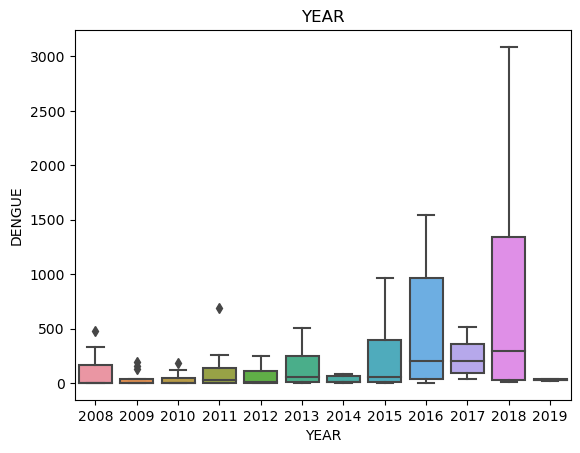

                sum_sq     df         F    PR(>F)
MONTH     7.939956e+06   11.0  4.601355  0.000008
Residual  1.913813e+07  122.0       NaN       NaN


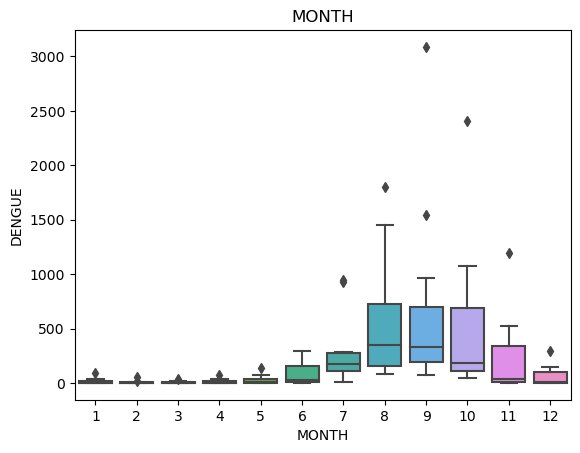

                sum_sq     df          F    PR(>F)
MIN       2.458449e+06    1.0  13.181155  0.000403
Residual  2.461964e+07  132.0        NaN       NaN


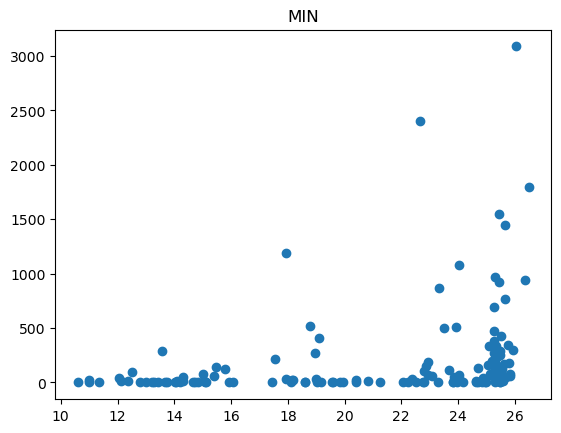

                sum_sq     df         F    PR(>F)
MAX       8.561205e+05    1.0  4.309666  0.039837
Residual  2.622196e+07  132.0       NaN       NaN


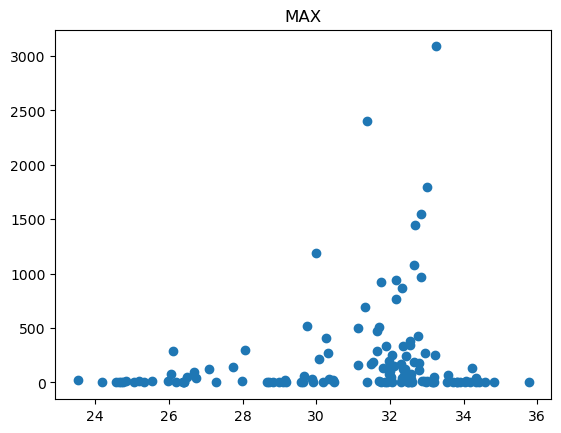

                sum_sq     df          F    PR(>F)
HUMIDITY  2.053186e+06    1.0  10.830035  0.001281
Residual  2.502490e+07  132.0        NaN       NaN


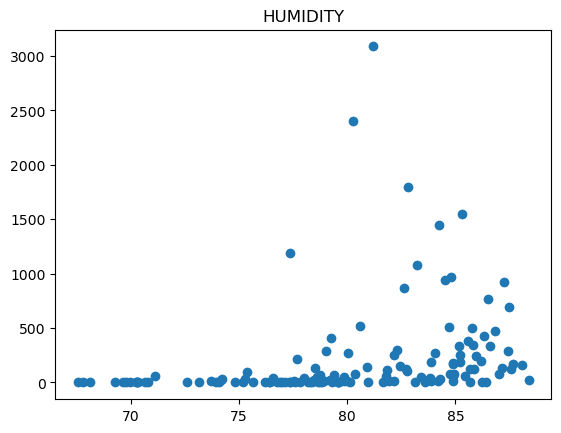

                sum_sq     df          F    PR(>F)
RAINFALL  3.680478e+06    1.0  20.763795  0.000012
Residual  2.339761e+07  132.0        NaN       NaN


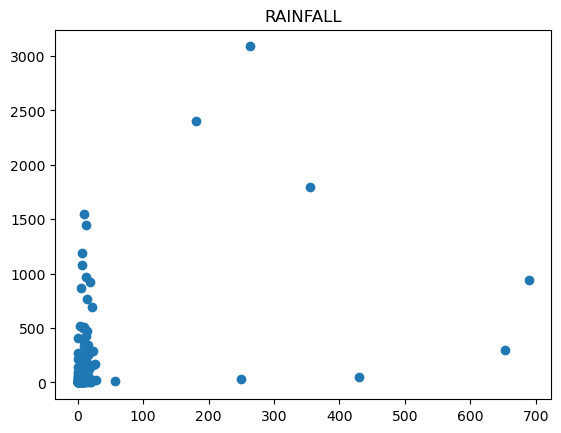

                sum_sq     df          F    PR(>F)
SEASON    5.451680e+06    3.0  10.923659  0.000002
Residual  2.162640e+07  130.0        NaN       NaN


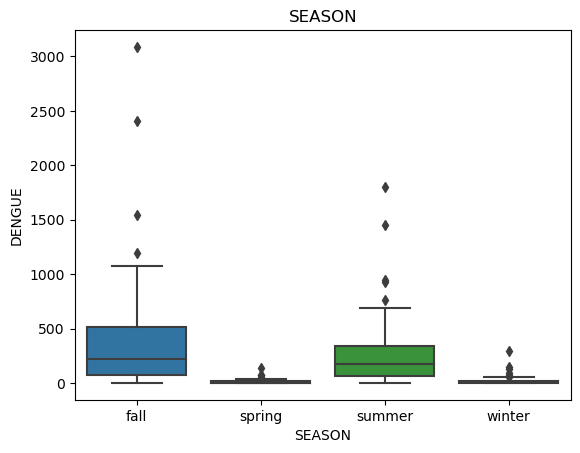

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,SEASON
0,None,None,None,None,None,None,None
1,"(Axes(0.125,0.11;0.775x0.77), Text(0.5, 1.0, '...","(Axes(0.125,0.11;0.775x0.77), Text(0.5, 1.0, '...",(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,(<matplotlib.collections.PathCollection object...,"(Axes(0.125,0.11;0.775x0.77), Text(0.5, 1.0, '..."


In [25]:
# bivariate analysis
combined_df[feature_cols].apply(lambda x:(print(sm.stats.anova_lm(ols('DENGUE ~ '+x.name, data=combined_df).fit(),typ=2)),
                                    (sns.boxplot(data=combined_df,x=x.name,y='DENGUE'), plt.title(x.name), plt.show()) if x.dtype =='category'
                                    else (plt.scatter(data=combined_df,x=x.name,y='DENGUE'), plt.title(x.name), plt.show())))

In [26]:
scaler = MinMaxScaler()

dengue_train[numerical_cols] = scaler.fit_transform(dengue_train[numerical_cols])
dengue_test[numerical_cols] = scaler.transform(dengue_test[numerical_cols])

# build linear_model2 with only numerical features
dengue_formula2 = 'DENGUE ~' + ' + '.join(numeric_features)
linear_model2 = ols(dengue_formula2, data=dengue_train).fit()

training_predictions2 = linear_model2.predict(dengue_train)
testing_predictions2 = linear_model2.predict(dengue_test)
# round up to the fourth decimal digits
training_mae = round(MAE(dengue_train['DENGUE'],training_predictions2),4)
testing_mae = round(MAE(dengue_test['DENGUE'],testing_predictions2),4)
# report training and testing mae
print(linear_model2.summary())
print('Training MAE:',training_mae)
print('Testing MAE:',testing_mae)

                            OLS Regression Results                            
Dep. Variable:                 DENGUE   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     7.745
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.72e-05
Time:                        21:01:22   Log-Likelihood:                 63.056
No. Observations:                 107   AIC:                            -116.1
Df Residuals:                     102   BIC:                            -102.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1559      0.100     -1.553      0.1